In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 1000)

In [2]:
data = pd.read_csv('./Data/new_retail_data.csv')

In [3]:
data.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## Data Exploration and cleaning

In [4]:
data.shape

(302010, 30)

In [5]:
data.isnull().any()

Transaction_ID       True
Customer_ID          True
Name                 True
Email                True
Phone                True
Address              True
City                 True
State                True
Zipcode              True
Country              True
Age                  True
Gender               True
Income               True
Customer_Segment     True
Date                 True
Year                 True
Month                True
Time                 True
Total_Purchases      True
Amount               True
Total_Amount         True
Product_Category     True
Product_Brand        True
Product_Type        False
Feedback             True
Shipping_Method      True
Payment_Method       True
Order_Status         True
Ratings              True
products            False
dtype: bool

In [6]:
data.dropna()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,31.0,Male,Medium,Regular,1/20/2024,2024.0,January,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,35.0,Female,Low,New,12/28/2023,2023.0,December,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,41.0,Male,Low,Premium,2/27/2024,2024.0,February,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,41.0,Male,Medium,New,9/3/2023,2023.0,September,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [7]:
data = data.dropna()

In [8]:
data.isnull().any()

Transaction_ID      False
Customer_ID         False
Name                False
Email               False
Phone               False
Address             False
City                False
State               False
Zipcode             False
Country             False
Age                 False
Gender              False
Income              False
Customer_Segment    False
Date                False
Year                False
Month               False
Time                False
Total_Purchases     False
Amount              False
Total_Amount        False
Product_Category    False
Product_Brand       False
Product_Type        False
Feedback            False
Shipping_Method     False
Payment_Method      False
Order_Status        False
Ratings             False
products            False
dtype: bool

In [9]:
data.shape

(293911, 30)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293911 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293911 non-null  float64
 1   Customer_ID       293911 non-null  float64
 2   Name              293911 non-null  object 
 3   Email             293911 non-null  object 
 4   Phone             293911 non-null  float64
 5   Address           293911 non-null  object 
 6   City              293911 non-null  object 
 7   State             293911 non-null  object 
 8   Zipcode           293911 non-null  float64
 9   Country           293911 non-null  object 
 10  Age               293911 non-null  float64
 11  Gender            293911 non-null  object 
 12  Income            293911 non-null  object 
 13  Customer_Segment  293911 non-null  object 
 14  Date              293911 non-null  object 
 15  Year              293911 non-null  float64
 16  Month             29

In [11]:
data = data.drop(['Email', 'Phone', 'Address', 'Year', 'Month', 'Time', 'Order_Status'], axis = 1)

In [12]:
data.duplicated().any()

True

In [13]:
data = data.drop_duplicates()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293907 entries, 0 to 302009
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293907 non-null  float64
 1   Customer_ID       293907 non-null  float64
 2   Name              293907 non-null  object 
 3   City              293907 non-null  object 
 4   State             293907 non-null  object 
 5   Zipcode           293907 non-null  float64
 6   Country           293907 non-null  object 
 7   Age               293907 non-null  float64
 8   Gender            293907 non-null  object 
 9   Income            293907 non-null  object 
 10  Customer_Segment  293907 non-null  object 
 11  Date              293907 non-null  object 
 12  Total_Purchases   293907 non-null  float64
 13  Amount            293907 non-null  float64
 14  Total_Amount      293907 non-null  float64
 15  Product_Category  293907 non-null  object 
 16  Product_Brand     29

In [15]:
data.head()

,Transaction_ID,Customer_ID,Name,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,5/8/2023,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,1/10/2024,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1.0,Chocolate cookies


In [16]:
data[['Transaction_ID', 'Customer_ID', 'Zipcode', 'Age', 'Total_Purchases']] = data[['Transaction_ID', 'Customer_ID', 'Zipcode', 'Age', 'Total_Purchases']].astype('int64')

In [17]:
data

,Transaction_ID,Customer_ID,Name,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products
0,8691788,37249,Michelle Harrington,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,9/18/2023,3,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5.0,Cycling shorts
1,2174773,69749,Kelsey Hill,Nottingham,England,99071,UK,19,Female,Low,Premium,12/31/2023,2,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4.0,Lenovo Tab
2,6679610,30192,Scott Jensen,Geelong,New South Wales,75929,Australia,48,Male,Low,Regular,4/26/2023,3,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2.0,Sports equipment
3,7232460,62101,Joseph Miller,Edmonton,Ontario,88420,Canada,56,Male,High,Premium,5/8/2023,7,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4.0,Utility knife
4,4983775,27901,Debra Coleman,Bristol,England,48704,UK,22,Male,Low,Premium,1/10/2024,2,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475,12104,Meagan Ellis,Townsville,New South Wales,4567,Australia,31,Male,Medium,Regular,1/20/2024,5,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,1.0,Historical fiction
302006,1197603,69772,Mathew Beck,Hanover,Berlin,16852,Germany,35,Female,Low,New,12/28/2023,1,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,5.0,LG Gram
302007,7743242,28449,Daniel Lee,Brighton,England,88038,UK,41,Male,Low,Premium,2/27/2024,3,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,2.0,Parka
302008,9301950,45477,Patrick Wilson,Halifax,Ontario,67608,Canada,41,Male,Medium,New,9/3/2023,1,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,4.0,TV stand


In [18]:
data[['Amount', 'Total_Amount']] = data[['Amount', 'Total_Amount']].astype(float)

In [19]:
data['Date'] = pd.to_datetime(data['Date'])

In [20]:
data.rename({
            'Amount': 'Unit_Price',
            'Total_Amount': 'Sales'
            }, axis = 1)

,Transaction_ID,Customer_ID,Name,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Total_Purchases,Unit_Price,Sales,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Ratings,products
0,8691788,37249,Michelle Harrington,Dortmund,Berlin,77985,Germany,21,Male,Low,Regular,2023-09-18,3,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,5.0,Cycling shorts
1,2174773,69749,Kelsey Hill,Nottingham,England,99071,UK,19,Female,Low,Premium,2023-12-31,2,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,4.0,Lenovo Tab
2,6679610,30192,Scott Jensen,Geelong,New South Wales,75929,Australia,48,Male,Low,Regular,2023-04-26,3,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,2.0,Sports equipment
3,7232460,62101,Joseph Miller,Edmonton,Ontario,88420,Canada,56,Male,High,Premium,2023-05-08,7,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,4.0,Utility knife
4,4983775,27901,Debra Coleman,Bristol,England,48704,UK,22,Male,Low,Premium,2024-01-10,2,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475,12104,Meagan Ellis,Townsville,New South Wales,4567,Australia,31,Male,Medium,Regular,2024-01-20,5,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,1.0,Historical fiction
302006,1197603,69772,Mathew Beck,Hanover,Berlin,16852,Germany,35,Female,Low,New,2023-12-28,1,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,5.0,LG Gram
302007,7743242,28449,Daniel Lee,Brighton,England,88038,UK,41,Male,Low,Premium,2024-02-27,3,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,2.0,Parka
302008,9301950,45477,Patrick Wilson,Halifax,Ontario,67608,Canada,41,Male,Medium,New,2023-09-03,1,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,4.0,TV stand


In [21]:
data = data.rename({
            'Amount': 'Unit Price',
            'Total_Amount': 'Sales'
            }, axis = 1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293907 entries, 0 to 302009
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    293907 non-null  int64         
 1   Customer_ID       293907 non-null  int64         
 2   Name              293907 non-null  object        
 3   City              293907 non-null  object        
 4   State             293907 non-null  object        
 5   Zipcode           293907 non-null  int64         
 6   Country           293907 non-null  object        
 7   Age               293907 non-null  int64         
 8   Gender            293907 non-null  object        
 9   Income            293907 non-null  object        
 10  Customer_Segment  293907 non-null  object        
 11  Date              293907 non-null  datetime64[ns]
 12  Total_Purchases   293907 non-null  int64         
 13  Unit Price        293907 non-null  float64       
 14  Sale

In [23]:
data.describe()

,Transaction_ID,Customer_ID,Zipcode,Age,Total_Purchases,Unit Price,Sales,Ratings
count,2.939070e+05,293907.000000,293907.000000,293907.000000,293907.000000,293907.000000,293907.000000,293907.000000
mean,5.493734e+06,55013.561297,50288.475045,35.465511,5.359838,255.153816,1367.684201,3.162317
std,2.596098e+06,26009.440254,28976.684491,15.017660,2.868446,141.389346,1128.900761,1.320756
min,1.000007e+06,10000.000000,501.000000,18.000000,1.000000,10.000219,10.003750,1.000000
25%,3.245886e+06,32470.000000,25408.000000,22.000000,3.000000,132.837591,438.839031,2.000000
50%,5.495900e+06,55027.000000,50586.000000,32.000000,5.000000,255.463226,1041.164230,3.000000
75%,7.738216e+06,77514.000000,75252.500000,46.000000,8.000000,377.639742,2028.954272,4.000000
max,9.999995e+06,99999.000000,99949.000000,70.000000,10.000000,499.997911,4999.625796,5.000000


In [24]:
data.to_csv('./Data/Retail_Data.csv')

## Simple Visualizations

In [25]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'City', 'State', 'Zipcode',
       'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date',
       'Total_Purchases', 'Unit Price', 'Sales', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Ratings', 'products'],
      dtype='object')

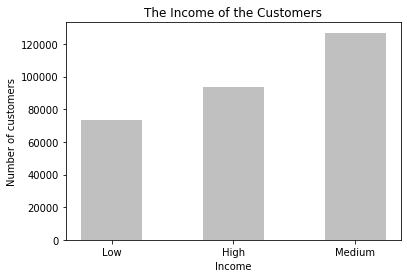

In [26]:
X = data['Income'].unique()
Y = data['Customer_ID'].groupby(by = data.Income).count()

plt.bar(X, Y, color = 'silver', width = 0.5)
plt.xlabel('Income')
plt.ylabel('Number of customers')
plt.title('The Income of the Customers')
plt.show()

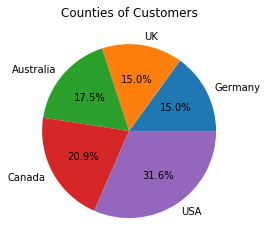

In [27]:
sizes = data['Customer_ID'].groupby(by = data.Country).count()
labels = data['Country'].unique()

plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Counties of Customers')
plt.show()

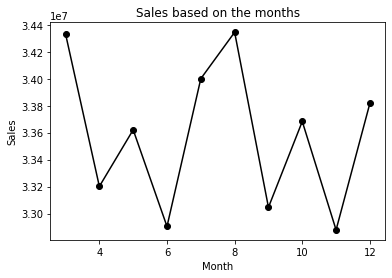

In [28]:
X = np.sort(data[data['Date'].dt.year == 2023]['Date'].dt.month.unique())
Y = data[data['Date'].dt.year == 2023]['Sales'].groupby(by = data['Date'].dt.month).sum()

plt.plot(X, Y, color = 'black', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales based on the months')
plt.show()

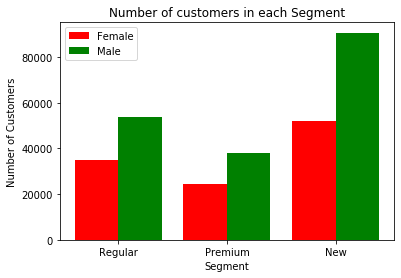

In [29]:
X = data['Customer_Segment'].unique()
female = data[data.Gender == 'Female']['Customer_ID'].groupby(by = data['Customer_Segment']).count()
male = data[data.Gender == 'Male']['Customer_ID'].groupby(by = data['Customer_Segment']).count()
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, female, 0.4, label = 'Female', color = 'red') 
plt.bar(X_axis + 0.2, male, 0.4, label = 'Male', color = 'green') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Segment") 
plt.ylabel("Number of Customers") 
plt.title("Number of customers in each Segment") 
plt.legend() 
plt.show() 

### Detailed visualisations in my Tableau Dashboard 
#### https://public.tableau.com/app/profile/mariia.brazhnyk/viz/RetailSalesDashboard_17251870618660/RetailSalesDashboard